In [ ]:
In questo esercizio è stata cambiata l'architettura della rete neurale profonda usando layer convoluzionali, 
come Conv2D, MaxPooling2D, Dropout,Flatten,Dense e soft-max.

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_train shape: (60000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)
An example of a data point with label 4


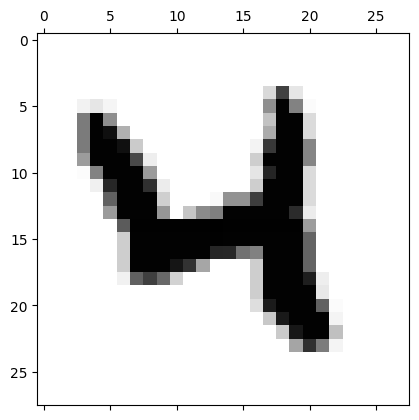

... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical
Epoch 1/50
1875/1875 [==============================] - 52s 27ms/step - loss: 0.9381 - acc: 0.6862 - val_loss: 0.2025 - val_acc: 0.9429
Epoch 2/50
1875/1875 [==============================] - 36s 19ms/step - loss: 0.3277 - acc: 0.8990 - val_loss: 0.1289 - val_acc: 0.9601
Epoch 3/50
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2449 - acc: 0.9247 - val_loss: 0.0966 - val_acc: 0.9695
Epoch 4/50
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2047 - acc: 0.9371 - val_loss: 0.0826 - val_acc: 0.9724
Epoch 5/50
1875/1875 [==============================] - 35s 18ms/step - loss: 0.1804 - acc: 0.9459 - val_loss: 0.0719 - val_acc: 0.9773
Epoch 6/50
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1605 - acc: 0.9521 - val_loss: 0.0634 - val_acc: 0.9791
Epoch 7/50
1875/1875 [==============================] - 35s 18ms/step - loss: 0.1459 - acc: 0.9560 - val_loss: 0

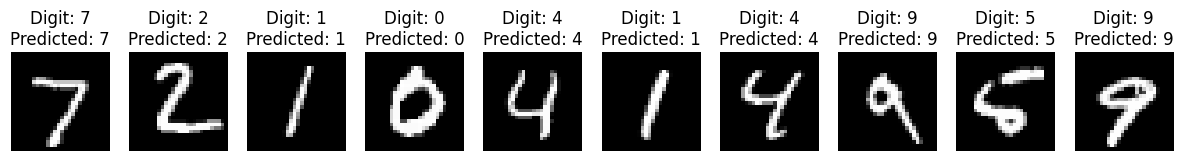

In [3]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt

seed = 0
np.random.seed(seed)  # fix random seed
tf.random.set_seed(seed)

from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28  # number of pixels
# output
num_classes = 10  # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()  # X immagini, Y label, X test e Y test variabili x dati caricati su mnist

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

# Reshape data to include the channel dimension
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

# Cast to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Rescale data in interval [0,1], normalizzo, toni di grigio diventano tra 0 e 1
X_train /= 255
X_test /= 255

# Look at an example of data point
print('An example of a data point with label', Y_train[20])
plt.matshow(X_train[20].reshape(28, 28), cmap='binary')
plt.show()

# Convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import keras

def create_CNN(input_shape, num_classes):
    # Instantiate model
    model = Sequential()

    # Add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5), activation='relu', input_shape=input_shape))

    # Add max pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Add second convolutional layer with 20 filters
    model.add(Conv2D(20, kernel_size=(5, 5), activation='relu'))

    # Add another max pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Add dropout layer
    model.add(Dropout(0.25))

    # Flatten the network
    model.add(Flatten())

    # Add a fully connected layer
    model.add(Dense(128, activation='relu'))

    # Add another dropout layer
    model.add(Dropout(0.5))

    # Add softmax layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['acc'])

    return model

# Training parameters
batch_size = 32
epochs = 50  # Inserire un numero adeguato di epoche

# Assumiamo che `input_shape`, `num_classes`, `X_train`, `Y_train`, `X_test` e `Y_test` siano già definiti
input_shape = (28, 28, 1)  # Esempio di input shape per immagini 28x28 in scala di grigi
num_classes = 10  # Numero di classi nel dataset

# Create the deep conv net
model_CNN = create_CNN(input_shape, num_classes)

# Train CNN
model_CNN.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(X_test, Y_test))

# Evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# Print performance
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Predictions
predictions = model_CNN.predict(X_test)

# Visualize some predictions
plt.figure(figsize=(15, 15))
for i in range(10):
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(X_test[i, :, :, 0], cmap='gray')
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))
    plt.axis('off')
plt.show()

